In [128]:
#On import les librairies
import pandas as pd
import missingno as mno
import xgboost as xgb
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score,classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [126]:
def evaluate(p_target_test, p_pred):
    precision = precision_score(p_target_test, p_pred)
    recall = recall_score(p_target_test, p_pred)
    f1 = f1_score(p_target_test, p_pred)
    
    print("Confusion Matrix:\n", confusion_matrix(p_target_test, p_pred))
    cm = pd.crosstab(p_target_test, p_pred)
    sns.heatmap(cm, annot=True)
    print("Accuracy Score:", accuracy_score(p_target_test, p_pred))
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

In [2]:


#On convertit les fichiers en DataFrame
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")
df_train2 = pd.read_excel("train.xlsx")

In [3]:
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [4]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df_train2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df_train2.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df_train2.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [11]:
df_test.Gender.value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [12]:
df_train.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [13]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [14]:
df_train3 = df_train.copy()

In [15]:
#On enleve la colonne Loan_status
df_train3.drop('Loan_Status', 1, inplace=True)

In [16]:
df_train3

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [17]:
#On combine les 2 jeux de données

df = df_train3.append(df_test)
df.reset_index(inplace=True)
df.drop(['index'], inplace=True, axis=1)

In [18]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural


In [19]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [20]:
df_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [21]:
df.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

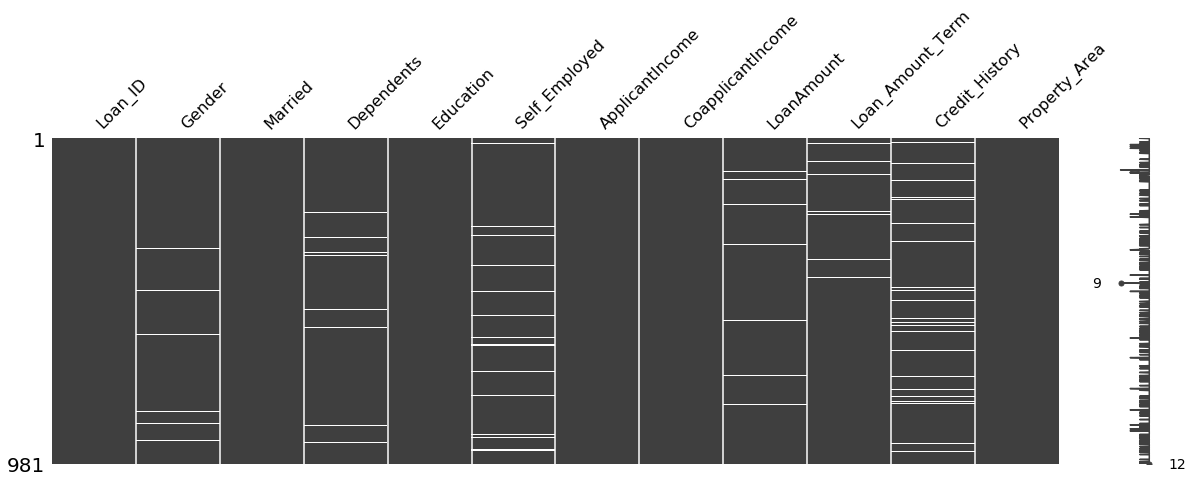

In [22]:
#On peut voir que les données manquantes ne sont pas très nombreuses
mno.matrix(df, figsize = (20, 6))

In [23]:
df.Gender.value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

In [24]:
classi = xgb.XGBClassifier()

In [25]:
df_drop = df.dropna()

In [26]:
df_drop

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
975,LP002969,Male,Yes,1,Graduate,No,2269,2167.0,99.0,360.0,1.0,Semiurban
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural


In [27]:
df_drop.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [28]:
lb = LabelEncoder()
raw_data = df_drop.copy()

In [29]:
raw_data['Gender'] = lb.fit_transform(raw_data['Gender'])
raw_data['Married'] = lb.fit_transform(raw_data['Married'])
raw_data['Education'] = lb.fit_transform(raw_data['Education'])
raw_data['Self_Employed'] = lb.fit_transform(raw_data['Self_Employed'])
raw_data['Property_Area'] = lb.fit_transform(raw_data['Property_Area'])
raw_data['Dependents'] = lb.fit_transform(raw_data['Dependents'])

In [30]:
raw_data = raw_data.drop("Loan_ID", axis=1)

In [31]:
raw_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
975,1,1,1,0,0,2269,2167.0,99.0,360.0,1.0,1
976,1,1,3,1,1,4009,1777.0,113.0,360.0,1.0,2
977,1,1,0,0,0,4158,709.0,115.0,360.0,1.0,2
979,1,1,0,0,0,5000,2393.0,158.0,360.0,1.0,0


In [32]:
raw_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [52]:
y = lb.fit_transform(df_train["Loan_Status"])

In [55]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [ ]:
raw_data['Gender'] = lb.fit_transform(raw_data['Gender'])
raw_data['Married'] = lb.fit_transform(raw_data['Married'])
raw_data['Education'] = lb.fit_transform(raw_data['Education'])
raw_data['Self_Employed'] = lb.fit_transform(raw_data['Self_Employed'])
raw_data['Property_Area'] = lb.fit_transform(raw_data['Property_Area'])
raw_data['Dependents'] = lb.fit_transform(raw_data['Dependents'])

In [57]:
X = raw_data.head(614)

In [58]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
773,1,1,0,1,0,7895,0.0,143.0,360.0,1.0,0
774,1,0,0,0,0,4150,4256.0,209.0,360.0,1.0,0
776,1,0,0,0,0,5583,0.0,116.0,360.0,1.0,2
777,0,0,0,0,0,2708,0.0,65.0,360.0,1.0,0


In [59]:
X = raw_data.head(614)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)
train_class = classi.fit(X_train, y_train)

In [60]:
predgbcla = train_class.predict(X_test)

In [61]:
print('precision',metrics.accuracy_score(y_test,predgbcla))

precision 0.5365853658536586


In [62]:
feature_imp = pd.Series(classi.feature_importances_,index=raw_data.columns).sort_values(ascending=False)
feature_imp

Gender               0.126751
Loan_Amount_Term     0.115436
Property_Area        0.096181
CoapplicantIncome    0.092366
LoanAmount           0.092294
ApplicantIncome      0.090958
Credit_History       0.090452
Self_Employed        0.088194
Married              0.079844
Dependents           0.071903
Education            0.055624
dtype: float32

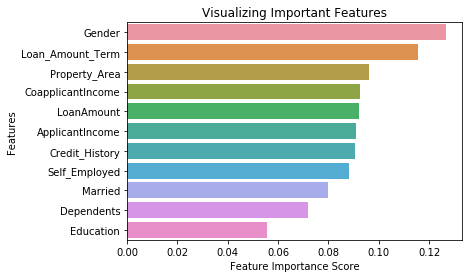

In [65]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [68]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [188]:
df_change = df_train.copy()

In [189]:
df_change.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [190]:
df_change = df_change.dropna()

In [191]:
#df_change = df_change.drop("Loan_ID", axis=1)
df_change['Gender'] = lb.fit_transform(df_change['Gender'])
df_change['Married'] = lb.fit_transform(df_change['Married'])
df_change['Education'] = lb.fit_transform(df_change['Education'])
df_change['Self_Employed'] = lb.fit_transform(df_change['Self_Employed'])
df_change['Property_Area'] = lb.fit_transform(df_change['Property_Area'])
df_change['Dependents'] = lb.fit_transform(df_change['Dependents'])
df_change['Loan_Status'] = lb.fit_transform(df_change['Loan_Status'])

In [192]:
df_change

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


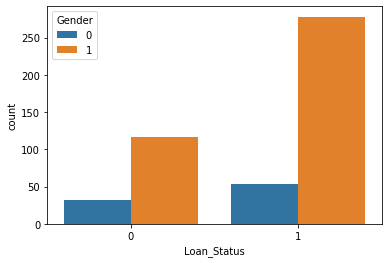

In [89]:
sns.countplot(x='Loan_Status',hue='Gender',data=df_change)

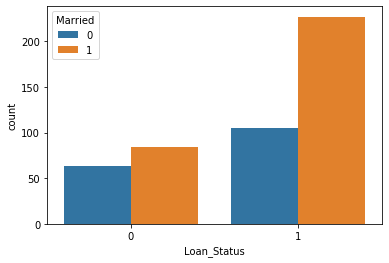

In [95]:
sns.countplot(x='Loan_Status',hue='Married',data=df_change)

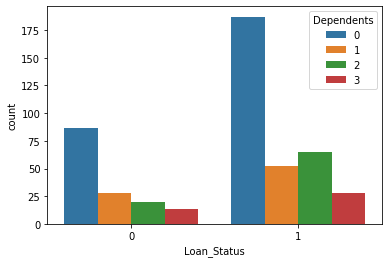

In [90]:
sns.countplot(x='Loan_Status',hue='Dependents',data=df_change)

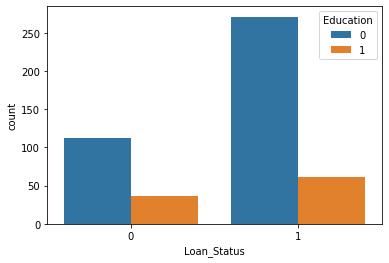

In [91]:
sns.countplot(x='Loan_Status',hue='Education',data=df_change)

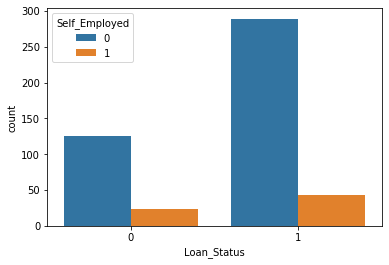

In [92]:
sns.countplot(x='Loan_Status',hue='Self_Employed',data=df_change)

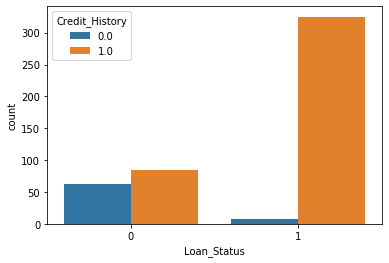

In [93]:
sns.countplot(x='Loan_Status',hue='Credit_History',data=df_change)

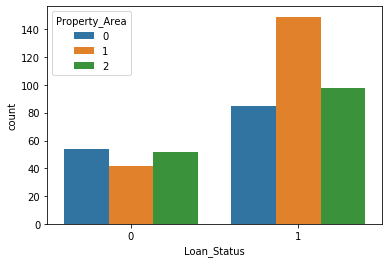

In [94]:
sns.countplot(x='Loan_Status',hue='Property_Area',data=df_change)

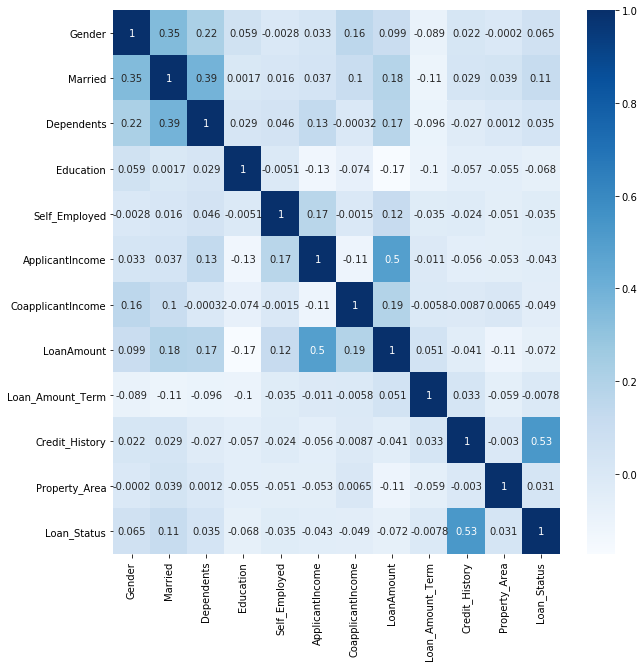

In [98]:
plt.figure(figsize=(10,10))
sns.heatmap(df_change.corr(),annot=True,cmap="Blues")

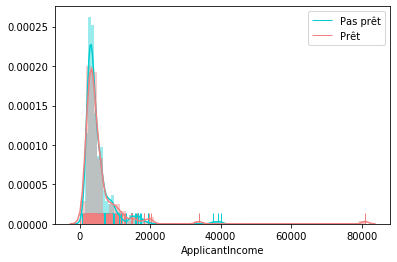

In [99]:
plt.figure()
ax = sns.distplot(df_change['ApplicantIncome'][df_change.Loan_Status == 1], color ="darkturquoise", rug = True)
sns.distplot(df_change['ApplicantIncome'][df_change.Loan_Status == 0], color ="lightcoral", rug = True)
plt.legend(['Pas prêt', 'Prêt'])

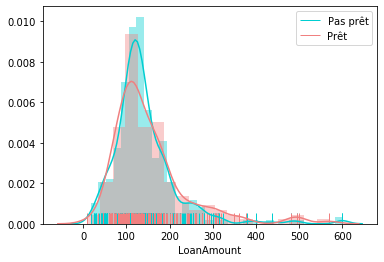

In [100]:
plt.figure()
ax = sns.distplot(df_change['LoanAmount'][df_change.Loan_Status == 1], color ="darkturquoise", rug = True)
sns.distplot(df_change['LoanAmount'][df_change.Loan_Status == 0], color ="lightcoral", rug = True)
plt.legend(['Pas prêt', 'Prêt'])

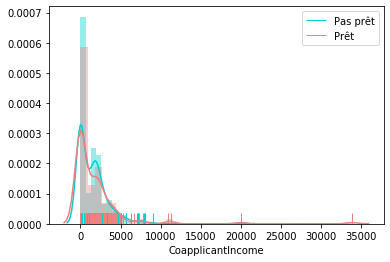

In [101]:
plt.figure()
ax = sns.distplot(df_change['CoapplicantIncome'][df_change.Loan_Status == 1], color ="darkturquoise", rug = True)
sns.distplot(df_change['CoapplicantIncome'][df_change.Loan_Status == 0], color ="lightcoral", rug = True)
plt.legend(['Pas prêt', 'Prêt'])

In [103]:
df_change.drop("Gender", axis=1)

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [147]:
X2 = df_change.drop("Loan_Status", axis=1)
y2 = df_change["Loan_Status"]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 7)
train_class2 = classi.fit(X_train2, y_train2)

In [149]:
predgbcla3 = train_class.predict(X_test2)

In [150]:
feature_imp_df_change = pd.Series(classi.feature_importances_,index=X2.columns).sort_values(ascending=False)
feature_imp_df_change

Credit_History       0.476979
Loan_Amount_Term     0.071117
Married              0.066390
CoapplicantIncome    0.060835
Self_Employed        0.054601
Education            0.052433
ApplicantIncome      0.051970
LoanAmount           0.048242
Property_Area        0.042099
Dependents           0.041364
Gender               0.033969
dtype: float32

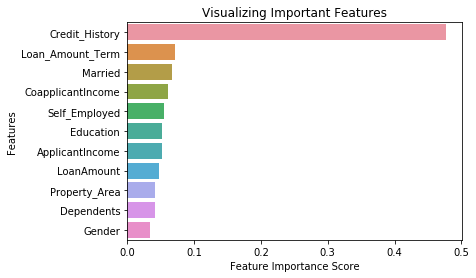

In [151]:
sns.barplot(x=feature_imp_df_change, y=feature_imp_df_change.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [121]:
#df_c = df_change.drop("Credit_History", axis=1)
#df_c = df_c.drop("Gender", axis=1)
df_c

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
1,1,1,0,0,4583,1508.0,128.0,360.0,0,0
2,1,0,0,1,3000,0.0,66.0,360.0,2,1
3,1,0,1,0,2583,2358.0,120.0,360.0,2,1
4,0,0,0,0,6000,0.0,141.0,360.0,2,1
5,1,2,0,1,5417,4196.0,267.0,360.0,2,1
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.0,360.0,0,1
610,1,3,0,0,4106,0.0,40.0,180.0,0,1
611,1,1,0,0,8072,240.0,253.0,360.0,2,1
612,1,2,0,0,7583,0.0,187.0,360.0,2,1


In [139]:
X3 = df_c.drop("Loan_Status", axis=1)
y3 = df_c["Loan_Status"]

train_class2 = classi.fit(X_train, y_train)

In [140]:
predgbcla = train_class2.predict(X_test)

In [141]:
feature_imp_df_change = pd.Series(classi.feature_importances_,index=X3.columns).sort_values(ascending=False)
feature_imp_df_change

Loan_Amount_Term     0.141337
Property_Area        0.119650
Self_Employed        0.119532
ApplicantIncome      0.117704
Married              0.111451
Education            0.102116
CoapplicantIncome    0.101478
LoanAmount           0.095577
Dependents           0.091154
dtype: float32

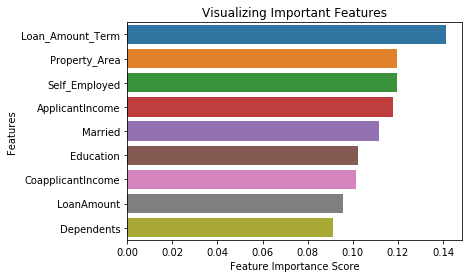

In [142]:
sns.barplot(x=feature_imp_df_change, y=feature_imp_df_change.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

Confusion Matrix:
 [[ 8 27]
 [18 43]]
Accuracy Score: 0.53125
Precision: 0.6142857142857143
Recall: 0.7049180327868853
F1 Score: 0.6564885496183206


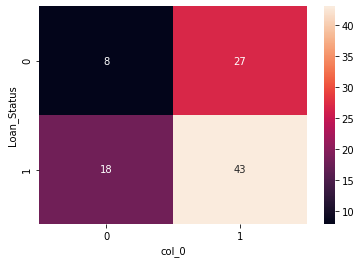

In [143]:
evaluate(y_test, predgbcla)

Confusion Matrix:
 [[18 17]
 [14 47]]
Accuracy Score: 0.6770833333333334
Precision: 0.734375
Recall: 0.7704918032786885
F1 Score: 0.7519999999999999


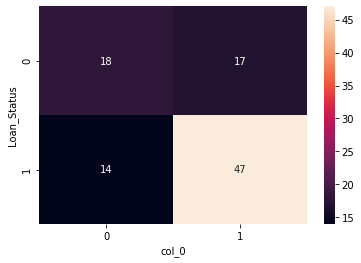

In [133]:
evaluate(y_test2, predgbcla2)

In [134]:
print(classification_report(y_test,predgbcla))

              precision    recall  f1-score   support

           0       0.31      0.23      0.26        35
           1       0.61      0.70      0.66        61

    accuracy                           0.53        96
   macro avg       0.46      0.47      0.46        96
weighted avg       0.50      0.53      0.51        96



In [153]:
print(classification_report(y_test,predgbcla3))

              precision    recall  f1-score   support

           0       0.56      0.51      0.54        35
           1       0.73      0.77      0.75        61

    accuracy                           0.68        96
   macro avg       0.65      0.64      0.64        96
weighted avg       0.67      0.68      0.67        96



In [178]:
df_c2 = df_change.drop(["Gender","Married","Dependents","Education","Self_Employed"],axis=1)

In [179]:
df_c2

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,4583,1508.0,128.0,360.0,1.0,0,0
2,3000,0.0,66.0,360.0,1.0,2,1
3,2583,2358.0,120.0,360.0,1.0,2,1
4,6000,0.0,141.0,360.0,1.0,2,1
5,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,0,1
610,4106,0.0,40.0,180.0,1.0,0,1
611,8072,240.0,253.0,360.0,1.0,2,1
612,7583,0.0,187.0,360.0,1.0,2,1


In [180]:
X4 = df_c2.drop("Loan_Status", axis=1)
y4 = df_c2["Loan_Status"]

train_class4 = classi.fit(X_train, y_train)

In [181]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size = 0.2, random_state = 7)
train_class4 = classi.fit(X_train4, y_train4)

In [182]:
predgbcla4 = train_class4.predict(X_test4)

In [183]:
feature_imp_df_change = pd.Series(classi.feature_importances_,index=X4.columns).sort_values(ascending=False)
feature_imp_df_change

Credit_History       0.641580
Loan_Amount_Term     0.094378
ApplicantIncome      0.069348
CoapplicantIncome    0.069146
LoanAmount           0.068912
Property_Area        0.056637
dtype: float32

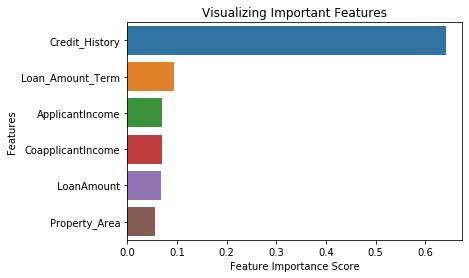

In [184]:
sns.barplot(x=feature_imp_df_change, y=feature_imp_df_change.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [185]:
print(classification_report(y_test4,predgbcla4))

              precision    recall  f1-score   support

           0       0.62      0.51      0.56        35
           1       0.75      0.82      0.78        61

    accuracy                           0.71        96
   macro avg       0.68      0.67      0.67        96
weighted avg       0.70      0.71      0.70        96

